In [1]:
from nltk.corpus import gutenberg, brown, inaugural

---
#### 1. 브라운에서 각 장르별 hapax의 개수를 cfd를 이용하여 구하시오.

In [2]:
import nltk

cfd1 = nltk.ConditionalFreqDist(
    (genre, word.lower())
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)

for genre in brown.categories():
    print(f'{genre}: {len(cfd1[genre].hapaxes())}개')

adventure: 4512개
belles_lettres: 8556개
editorial: 4967개
fiction: 4838개
government: 3347개
hobbies: 5552개
humor: 3173개
learned: 7065개
lore: 6945개
mystery: 3452개
news: 6834개
religion: 3317개
reviews: 4928개
romance: 4329개
science_fiction: 1896개


---
#### 2. cfd를 이용하여 nltk.book의 텍스트별 빈도수를 만들고, wh-word의 빈도수를 출력하시오.

wh-word = what, why, when, where, which

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


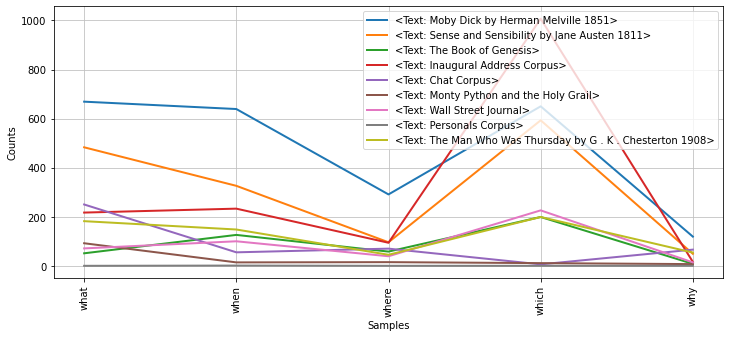

<Text: Moby Dick by Herman Melville 1851> | what:669번 why:119번 when:639번 where:291번 which:650번 
<Text: Sense and Sensibility by Jane Austen 1811> | what:483번 why:49번 when:326번 where:96번 which:593번 
<Text: The Book of Genesis> | what:51번 why:8번 when:126번 where:58번 which:199번 
<Text: Inaugural Address Corpus> | what:217번 why:16번 when:233번 where:94번 which:1007번 
<Text: Chat Corpus> | what:250번 why:66번 when:55번 where:70번 which:6번 
<Text: Monty Python and the Holy Grail> | what:92번 why:7번 when:14번 where:15번 which:11번 
<Text: Wall Street Journal> | what:71번 why:14번 when:100번 where:39번 which:226번 
<Text: Personals Corpus> | what:0번 why:0번 when:1번 where:0번 which:0번 
<Text: The Man Who Was Thursday by G . K . Chesterton 1908> | what:182번 why:54번 when:148번 where:45번 which:199번 


In [3]:
import nltk 
from nltk.book import *
import matplotlib.pyplot as plt

texts = [text1, text2, text3, text4, text5, text6, text7, text8, text9]
wh_list = ['what', 'why', 'when', 'where', 'which']

cfd2 = nltk.ConditionalFreqDist(
    (txt, wh_word)
    for txt in texts
    for wh_word in wh_list
    
    for word in txt.tokens[:]
        if word.lower().startswith(wh_word)
)

plt.figure(figsize=(12, 5))

cfd2.plot()

# 각 빈도수 출력
for txt in texts:
    print(f'{txt} |', end=' ')
    for wh_word in wh_list:
        print(f'{wh_word}:{cfd2[txt][wh_word]}번', end=' ')
    print()

---
#### 3. 소인수분해 (영어: prime factorization, integer factorization)는 1보다 큰 자연수를 소인수(소수인 인수)들만의 곱으로 나타내는 것 또는 합성수를 소수의 곱으로 나타내는 방법을 말한다.

예: 15 = 1 * 3 * 5 (소인수 = [1, 3, 5])
8 = 2 * 2 * 2 (소인수 = [1, 2])

무작위 수 n이 주어졌을 때 n의 소인수를 출력하는 함수를 만드시오.

단, 위의 예에서 8과 같은 경우는 2가 한 번만 출력되어야 함.
- n의 무작위 생성을 위해 다음의 코드를 참고하세요.
```
import random
random.randint(1, 300)
```

In [4]:
import random
n = random.randint(1, 300)

def factorization(n):
    prime_list = []

    d = 2
    while d <= n:
        if n % d == 0:
            prime_list.append(d)
            n = n / d
        else:
            d = d + 1

    return set(prime_list)

print(f'{n}의 소인수는 {factorization(n)}입니다.')

294의 소인수는 {2, 3, 7}입니다.


---
#### 4. 다음은 n이 각각 1, 2, 3, 4, 5, 6일 때의 삼각수를 그림으로 나타낸 것이다.

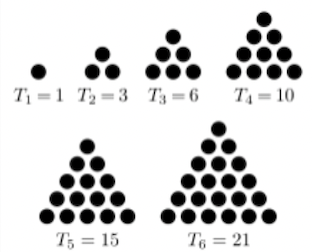

양의 정수가 세 삼각수의 합으로 나타낼 수 있는지를 구하는 프로그램을 작성하시오.
- 입력: n은 1이상 1000이하의 양의 정수
- 출력: n을 세 수의 합으로 나타낼 수 있으면 이 세 삼각수를 오름차순으로 출력, 세 수의 합으로 나타낼 수 없으면 -1을 출력. (단, 해가 여러 개 있을 경우 세 수의 최솟값이 가장 작은 것출력)

[입출력 예시]

입력1) 10   출력1) 1 3 6
입력2) 6    출력2) -1

(힌트) n번째 삼각수 = n * (n + 1) / 2

In [5]:
n = int(input())

# 44번째 삼각수: 990, 45번째 삼각수: 1035
triangle_num = [
    num * (num + 1) // 2
    for num in range(1, 45)
]

answer = False
for a in triangle_num:
    for b in triangle_num:
        for c in triangle_num:
            if (a + b + c) == n:
                nums = [a, b, c]
                nums.sort()

                answer = True
                break

        if answer:
            break

    if answer:
        break

if answer:
    for num in nums:
        print(num, end=" ")
else:
    print(-1)

 10


1 3 6 

---
#### 5. gutenberg에서
- 1.파일 중 모음 (a, e, i, o, u)으로 시작하는 파일을 골라
- 2.단어를 가져오되 숫자, 문장부호를 모두 제거하고
- 3.모든 단어를 하나의 스트링으로 출력하시오.

In [6]:
file_list = [file for file in gutenberg.fileids() 
             if file.startswith(('a', 'e', 'i', 'o', 'u'))]

word_list = [[word 
              for word in gutenberg.words(file) 
              if word[0].isalpha()] 
             
             for file in file_list]
output = ' '.join([' '.join(txt) for txt in word_list])

# 너무 많아서 1000까지만 출력
output[:1000]

'Emma by Jane Austen VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich with a comfortable home and happy disposition seemed to unite some of the best blessings of existence and had lived nearly twenty one years in the world with very little to distress or vex her She was the youngest of the two daughters of a most affectionate indulgent father and had in consequence of her sister s marriage been mistress of his house from a very early period Her mother had died too long ago for her to have more than an indistinct remembrance of her caresses and her place had been supplied by an excellent woman as governess who had fallen little short of a mother in affection Sixteen years had Miss Taylor been in Mr Woodhouse s family less as a governess than a friend very fond of both daughters but particularly of Emma Between it was more the intimacy of sisters Even before Miss Taylor had ceased to hold the nominal office of governess the mildness of her temper had hardly allowed her to impos

---
#### 6. 다음과 같은 규칙을 따르는 프로그램이 있다고 하자.
A. 주어진 수가 10보다 작다면 앞에 0을 붙여 두 자리 수로 만들고, 각 자리의 숫자를 더한다.

B. 그 다음, 주어진 수의 가장 오른쪽 자리 수와 앞에서 구한 합의 가장 오른쪽 자리 수를 이어 붙이면 새로운 수를 만들 수 있다.

예를 들어, 26은 2 + 6 = 8이다. 새로운 수는 68이다. 6 + 8 =14이다. 새로운 수는 84이다. 8 + 4 = 12이다. 새로운 수는 42이다. 4 + 2 = 6이다. 새로운 수는 26이다. 26은 4번만에 원래 수로 돌아올 수 있다. 따라서 26의 사이클의 길이는 4이다.

n이 주어졌을 때, n의 사이클의 길이를 구하는 프로그램을 작성하시오.

- 입력: n (n은 0보다 크거나 같고, 99보다 작거나 같은 정수)
- 출력: n의 사이클의 길이

In [7]:
n = int(input())
cycle = 0
temp = n

while True:
    if temp == n and cycle != 0:
        break

    x = temp % 10
    y = ((temp // 10) + x) % 10

    temp = 10 * x + y
    cycle += 1

print(cycle)

 26


4
